In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
plt.rcParams['pdf.fonttype'] = 42

In [2]:
concs = [40,200,1000,5000,25000,125000,625000]
adds = ['BV', 'PCB']

dose = pd.read_csv('quantification/Dose.csv', index_col=0)

sample =[]
concentration = []
for add in adds:
    for conc in concs:
        sample = np.hstack([sample, np.full(50, (add))])
        concentration = np.hstack([concentration, np.full(50, (conc))])
dose['sample'] = sample 
dose['concentration (nM)'] = concentration

Norm_BV= (dose[dose['sample']=='BV']['Mean'] - dose[dose['sample']=='BV']['Mean'].min()) / (dose[dose['sample']=='BV']['Mean'].max() - dose[dose['sample']=='BV']['Mean'].min())
Norm_PCB= (dose[dose['sample']=='PCB']['Mean'] - dose[dose['sample']=='PCB']['Mean'].min()) / (dose[dose['sample']=='PCB']['Mean'].max()- dose[dose['sample']=='PCB']['Mean'].min())
dose['Norm'] = np.hstack([Norm_BV,Norm_PCB])

dose

Mean  Slice sample  concentration (nM)      Norm
                                                         
1      35.833      1     BV                40.0  0.018667
2      49.071      1     BV                40.0  0.036732
3      46.071      1     BV                40.0  0.032638
4      32.808      1     BV                40.0  0.014539
5      67.833      1     BV                40.0  0.062335
..        ...    ...    ...                 ...       ...
696  3128.949     14    PCB            625000.0  0.410582
697  4876.538     14    PCB            625000.0  0.641643
698  4782.071     14    PCB            625000.0  0.629153
699  4958.628     14    PCB            625000.0  0.652497
700  4781.782     14    PCB            625000.0  0.629115

[700 rows x 5 columns]

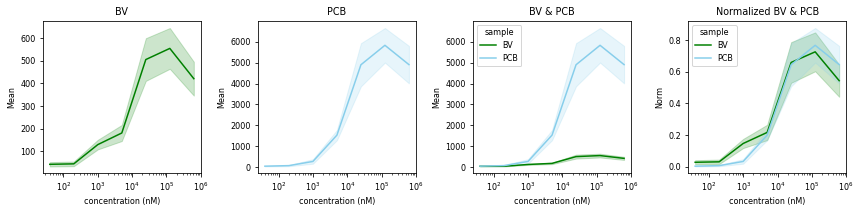

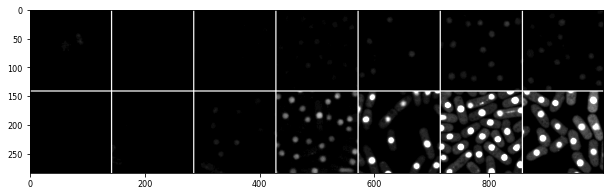

In [4]:
plt.rcParams["font.size"] = 8

plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
sns.lineplot(data=dose[dose['sample']=='BV'], x='concentration (nM)', y='Mean', ci='sd',color='green')
plt.xscale('log')
plt.title('BV')

plt.subplot(1,4,2)
sns.lineplot(data=dose[dose['sample']=='PCB'], x='concentration (nM)', y='Mean', ci='sd', color='skyblue')
plt.xscale('log')
plt.title('PCB')

plt.subplot(1,4,3)
sns.lineplot(data=dose, x='concentration (nM)', y='Mean', hue='sample', ci='sd',palette=['green','skyblue'])
plt.xscale('log')
plt.title('BV & PCB')

plt.subplot(1,4,4)
sns.lineplot(data=dose, x='concentration (nM)', y='Norm', hue='sample', ci='sd',palette=['green','skyblue'])
plt.xscale('log')
plt.title('Normalized BV & PCB')

plt.tight_layout()
plt.savefig('dose-response.pdf')
plt.savefig('dose-response.png',bbox_inches='tight',dpi=200)

plt.figure(figsize=(12,3))
img = cv2.imread('processed-image/dose_montage.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, vmax=20,cmap='gray')

In [7]:
dose_group = dose.groupby(['sample', 'concentration (nM)'])
dose_group.mean()

Mean  Slice      Norm
sample concentration (nM)                             
BV     40.0                  42.64588      1  0.027964
       200.0                 44.67358      2  0.030731
       1000.0               129.63174      3  0.146668
       5000.0               181.00744      4  0.216777
       25000.0              505.29318      5  0.659310
       125000.0             554.51364      6  0.726478
       625000.0             420.76546      7  0.543960
PCB    40.0                  47.95312      8  0.003222
       200.0                 74.66628      9  0.006754
       1000.0               273.83756     10  0.033088
       5000.0              1533.05760     11  0.199578
       25000.0             4900.06668     12  0.644754
       125000.0            5830.84916     13  0.767819
       625000.0            4906.10008     14  0.645551